# WeatherPy

### Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import json
import requests
import time
from scipy.stats import linregress
import scipy.stats as st

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

In [2]:
pip install citipy

Note: you may need to restart the kernel to use updated packages.


    Generate the Cities List by Using the citipy Library 

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 606


# Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code¶

In [4]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=" + weather_api_key

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city 
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | hermanus
Processing Record 2 of Set 1 | rikitea
Processing Record 3 of Set 1 | yellowknife
Processing Record 4 of Set 1 | ushuaia
Processing Record 5 of Set 1 | new norfolk
Processing Record 6 of Set 1 | butaritari
Processing Record 7 of Set 1 | ust-koksa
Processing Record 8 of Set 1 | barentsburg
City not found. Skipping...
Processing Record 9 of Set 1 | richards bay
Processing Record 10 of Set 1 | deputatskiy
Processing Record 11 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 12 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 13 of Set 1 | rawannawi
City not found. Skipping...
Processing Record 14 of Set 1 | vaitupu
City not found. Skipping...
Processing Record 15 of Set 1 | chara
Processing Record 16 of Set 1 | kalemie
Processing Record 17 of Set 1 | busselton
Processing Record 18 of Set 1 | avarua
Processing Record 19 of Set 1 | nuevo progreso
Pro

Processing Record 39 of Set 4 | lazaro cardenas
Processing Record 40 of Set 4 | general roca
Processing Record 41 of Set 4 | tsihombe
City not found. Skipping...
Processing Record 42 of Set 4 | esperance
Processing Record 43 of Set 4 | torbay
Processing Record 44 of Set 4 | sorland
Processing Record 45 of Set 4 | ojinaga
Processing Record 46 of Set 4 | louisbourg
City not found. Skipping...
Processing Record 47 of Set 4 | arraial do cabo
Processing Record 48 of Set 4 | chuy
Processing Record 49 of Set 4 | staryy nadym
Processing Record 0 of Set 5 | narsaq
Processing Record 1 of Set 5 | saleaula
City not found. Skipping...
Processing Record 2 of Set 5 | barinas
Processing Record 3 of Set 5 | roald
Processing Record 4 of Set 5 | makakilo city
Processing Record 5 of Set 5 | saint-philippe
Processing Record 6 of Set 5 | mukhen
Processing Record 7 of Set 5 | ancud
Processing Record 8 of Set 5 | portland
Processing Record 9 of Set 5 | pasighat
Processing Record 10 of Set 5 | springfield
Proc

Processing Record 25 of Set 8 | karaul
City not found. Skipping...
Processing Record 26 of Set 8 | bambanglipuro
Processing Record 27 of Set 8 | ust-tarka
Processing Record 28 of Set 8 | cayenne
Processing Record 29 of Set 8 | corinth
Processing Record 30 of Set 8 | oeiras do para
Processing Record 31 of Set 8 | teahupoo
Processing Record 32 of Set 8 | ust-kamchatsk
City not found. Skipping...
Processing Record 33 of Set 8 | goure
Processing Record 34 of Set 8 | buchanan
Processing Record 35 of Set 8 | orchard homes
Processing Record 36 of Set 8 | milevsko
Processing Record 37 of Set 8 | belushya guba
City not found. Skipping...
Processing Record 38 of Set 8 | san juan
Processing Record 39 of Set 8 | nichinan
Processing Record 40 of Set 8 | camacha
Processing Record 41 of Set 8 | bayamo
Processing Record 42 of Set 8 | chuguyevka
Processing Record 43 of Set 8 | ketchikan
Processing Record 44 of Set 8 | kidal
Processing Record 45 of Set 8 | kropotkin
Processing Record 46 of Set 8 | san p

Processing Record 12 of Set 12 | pontianak
Processing Record 13 of Set 12 | elbistan
Processing Record 14 of Set 12 | doha
Processing Record 15 of Set 12 | padang
Processing Record 16 of Set 12 | yanliang
Processing Record 17 of Set 12 | cam ranh
Processing Record 18 of Set 12 | minggang
Processing Record 19 of Set 12 | mitsamiouli
Processing Record 20 of Set 12 | quatre cocos
Processing Record 21 of Set 12 | norilsk
Processing Record 22 of Set 12 | zlobin
Processing Record 23 of Set 12 | oussouye
Processing Record 24 of Set 12 | erenhot
Processing Record 25 of Set 12 | paita
Processing Record 26 of Set 12 | el tigre
Processing Record 27 of Set 12 | fortuna
Processing Record 28 of Set 12 | tabou
Processing Record 29 of Set 12 | waipawa
Processing Record 30 of Set 12 | bom jesus
Processing Record 31 of Set 12 | conceicao do araguaia
Processing Record 32 of Set 12 | novobirilyussy
Processing Record 33 of Set 12 | arlit
Processing Record 34 of Set 12 | wewak
Processing Record 35 of Set 12

In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Extract relevant fields from the data frame
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

# Show Record Count
city_data_df.count()

City          557
Lat           557
Lng           557
Max Temp      557
Humidity      557
Cloudiness    557
Wind Speed    557
Country       557
Date          557
dtype: int64

In [6]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,hermanus,-34.4187,19.2345,21.00,88,69,5.88,ZA,1675658966
1,rikitea,-23.1203,-134.9692,25.99,76,3,6.42,PF,1675658717
2,yellowknife,62.4560,-114.3525,-19.69,77,100,4.63,CA,1675658748
3,ushuaia,-54.8000,-68.3000,5.81,65,75,4.12,AR,1675658678
4,new norfolk,-42.7826,147.0587,23.72,43,33,2.24,AU,1675658968


In [7]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [8]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,hermanus,-34.4187,19.2345,21.00,88,69,5.88,ZA,1675658966
1,rikitea,-23.1203,-134.9692,25.99,76,3,6.42,PF,1675658717
2,yellowknife,62.4560,-114.3525,-19.69,77,100,4.63,CA,1675658748
3,ushuaia,-54.8000,-68.3000,5.81,65,75,4.12,AR,1675658678
4,new norfolk,-42.7826,147.0587,23.72,43,33,2.24,AU,1675658968


# Create the Scatter Plots Requested 

### Temperature Vs. Latitude 

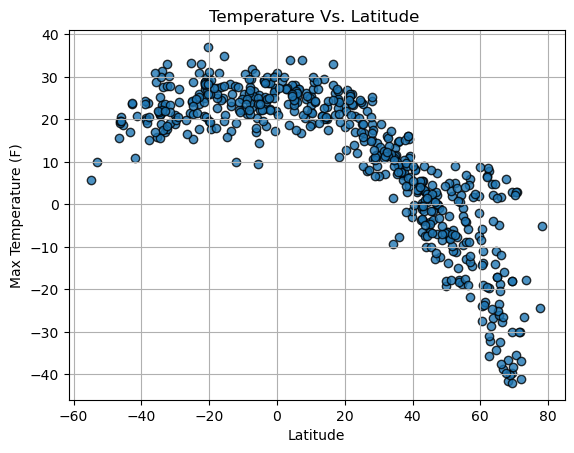

In [9]:
# Build scatter plot for latitude vs. temperature
plt.scatter(lats,
            max_temps,
           edgecolor="black", linewidth=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("Temperature Vs. Latitude ")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

### Humidity Vs. Latitude

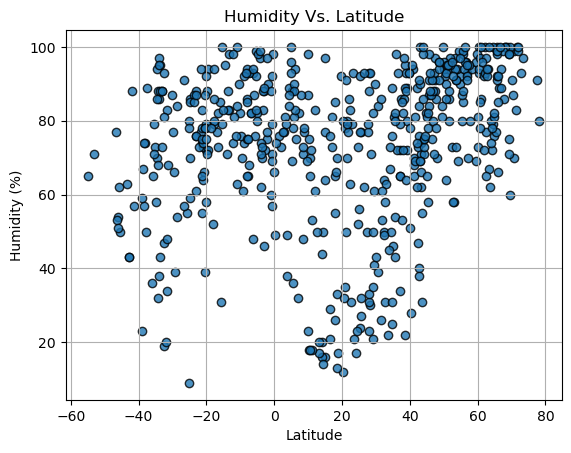

In [10]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(lats,
            humidity,
           edgecolor="black", linewidth=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("Humidity Vs. Latitude")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

### Cloudiness Vs. Latitude

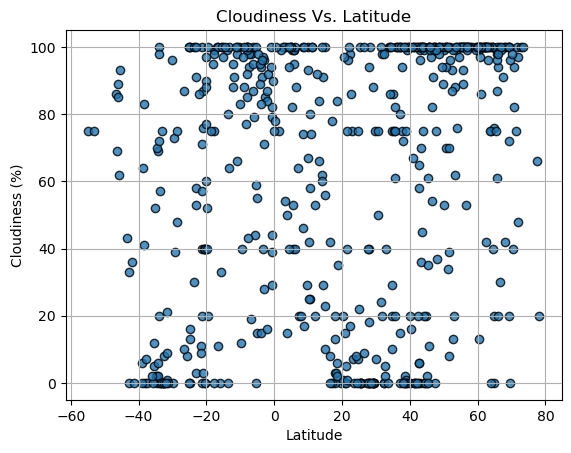

In [11]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(lats,
            cloudiness,
           edgecolor="black", linewidth=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("Cloudiness Vs. Latitude") 
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

### Wind Speed Vs. Latitude 

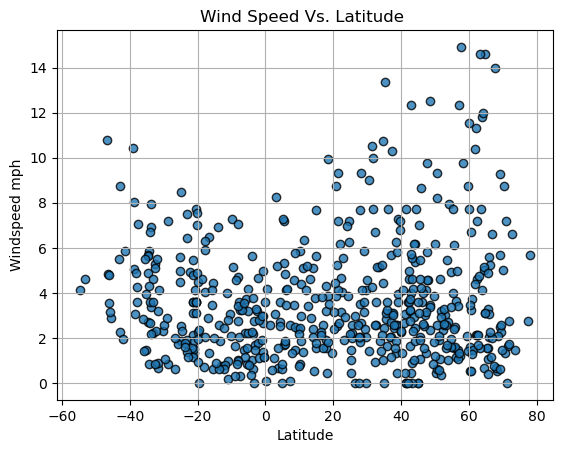

In [12]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(lats,
            wind_speed,
           edgecolor="black", linewidth=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("Wind Speed Vs. Latitude ")
plt.ylabel("Windspeed mph")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

# Requirement 2: Compute Linear Regression for Each Relationship

In [13]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values,y_values,title,text_coordinates):
    
    # Run regression on Southern Hemisphere
    (slope, intercept, rvalue, pvalue, stderr) = linregress (x_values,y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + " x + " + str(round(intercept,2))
    
    # Plot
    plt.scatter(x_values,y_values)
    plt.plot(x_values, regress_values, "r-")
    plt.annotate(line_eq,text_coordinates, fontsize=15, color="red")
    plt.xlabel("Latitude")
    plt.ylabel("Title")
    print(f"The r-squared is: {rvalue}")
    plt.show()

In [14]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,yellowknife,62.4560,-114.3525,-19.69,77,100,4.63,CA,1675658748
5,butaritari,3.0707,172.7902,27.14,81,54,8.26,KI,1675658754
6,ust-koksa,50.2696,85.6108,-6.58,92,100,0.43,RU,1675658968
8,deputatskiy,69.3000,139.9000,-39.66,99,72,2.48,RU,1675658913
9,chara,56.9064,118.2631,-21.87,93,100,1.48,RU,1675658880


In [15]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] <0)]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,hermanus,-34.4187,19.2345,21.00,88,69,5.88,ZA,1675658966
1,rikitea,-23.1203,-134.9692,25.99,76,3,6.42,PF,1675658717
3,ushuaia,-54.8000,-68.3000,5.81,65,75,4.12,AR,1675658678
4,new norfolk,-42.7826,147.0587,23.72,43,33,2.24,AU,1675658968
7,richards bay,-28.7830,32.0377,24.09,84,48,0.86,ZA,1675658969


### Temperature Vs. Latitude Linear Regression Plot

In [16]:
# Define function for creating linear agression and scatter plot
def linear_agression(x,y):
    print(f"The r-value is : {(st.pearsonr(x, y)[0])}")
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x, y)
    plt.plot(x,regress_values,"r-")
    return line_eq

# Define a fuction for annotating
def annotate(line_eq, a, b):
    plt.annotate(line_eq,(a,b),fontsize=15,color="red")

The r-value is : -0.8692257681804584


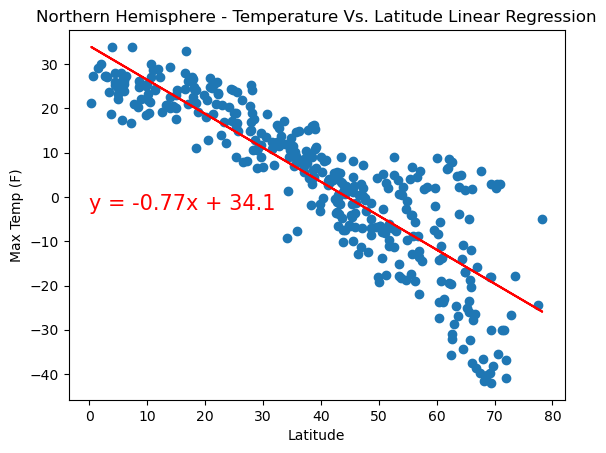

There is a strong, negative correlation between latitude and max temperature in the Northern Hemisphere.
In the Northern Hemisphere, as you move further from the equator, the temperature drops.


In [17]:
# Linear regression on Northern Hemisphere
equation = linear_agression(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"])
annotate(equation, 0, -3)
plt.title("Northern Hemisphere - Temperature Vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")
plt.show()
print("There is a strong, negative correlation between latitude and max temperature in the Northern Hemisphere.")
print("In the Northern Hemisphere, as you move further from the equator, the temperature drops.")

The r-value is : 0.31420155907302494


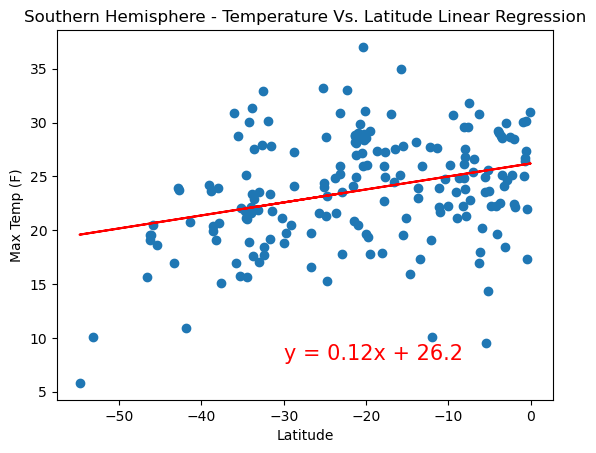

There is a weak correlation between latitude and max temperature in the Southern Hemisphere.
In the Southern Hemisphere, as you move closer to the equator, it's possible that the temperature will rise.


In [18]:
# Linear regression on Southern Hemisphere
equation = linear_agression(southern_hemi_df["Lat"],southern_hemi_df["Max Temp"])
annotate(equation, -30, 8)
plt.title("Southern Hemisphere - Temperature Vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")
plt.show()
print("There is a weak correlation between latitude and max temperature in the Southern Hemisphere.")
print("In the Southern Hemisphere, as you move closer to the equator, it's possible that the temperature will rise.")

### Humidity Vs. Latitude Linear Regression Plot

The r-value is : 0.45880741934015334


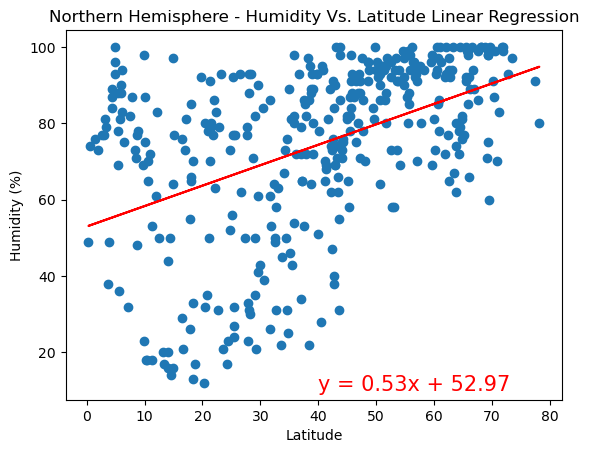

There is a positive, but weak correlation between latitude and humidity in the Northern Hemisphere.
In the Northern Hemisphere, as you move further away from the equator, it's possible that there will be an increase in humidity.


In [19]:
# Northern Hemisphere
equation = linear_agression(northern_hemi_df["Lat"], northern_hemi_df["Humidity"])
annotate(equation, 40, 10)
plt.title("Northern Hemisphere - Humidity Vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.show()
print("There is a positive, but weak correlation between latitude and humidity in the Northern Hemisphere.")
print("In the Northern Hemisphere, as you move further away from the equator, it's possible that there will be an increase in humidity.")

The r-value is : 0.36055204422235554


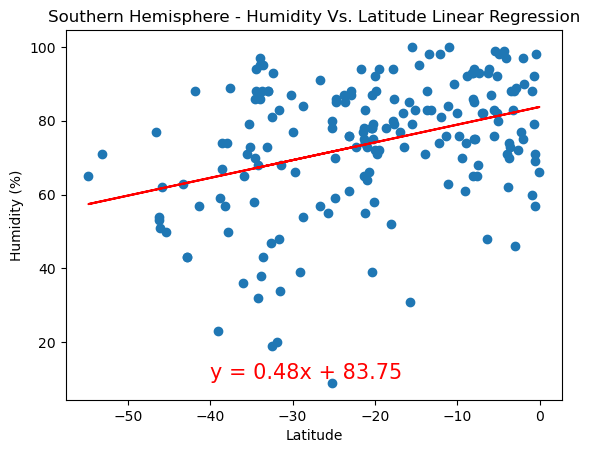

There is a weak correlation between latitude and humidity in the Southern Hemisphere.
It's possible that as you move closer to the equator, in the Southern Hemisphere, the humidity will increase.


In [20]:
# Southern Hemisphere
# Call an function #1
equation = linear_agression(southern_hemi_df["Lat"], southern_hemi_df["Humidity"])
annotate(equation, -40, 10)
plt.title("Southern Hemisphere - Humidity Vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.show()
print("There is a weak correlation between latitude and humidity in the Southern Hemisphere.")
print("It's possible that as you move closer to the equator, in the Southern Hemisphere, the humidity will increase.")

### Cloudiness Vs. Latitude Linear Regression Plot

The r-value is : 0.2672927914533878


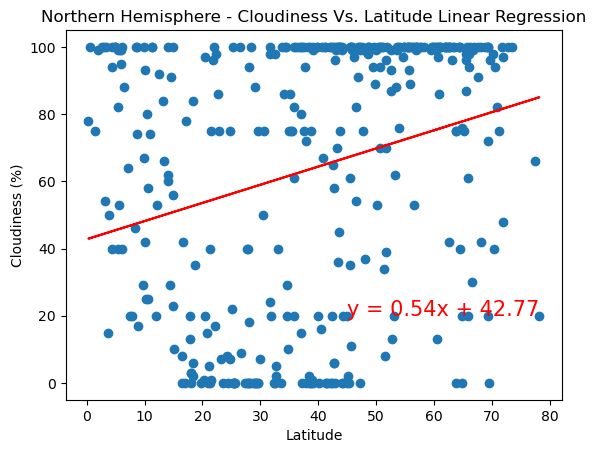

There is a weak correlation between latitude and cloudiness in the Northern Hemisphere.
It's possible that as you move away from the equator, in the Northern Hemisphere, there will be more cloudiness.


In [21]:
# Northern Hemisphere
equation = linear_agression(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"])
annotate(equation, 45, 20)
plt.title("Northern Hemisphere - Cloudiness Vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.show()
print("There is a weak correlation between latitude and cloudiness in the Northern Hemisphere.")
print("It's possible that as you move away from the equator, in the Northern Hemisphere, there will be more cloudiness.")

The r-value is : 0.3870856155686091


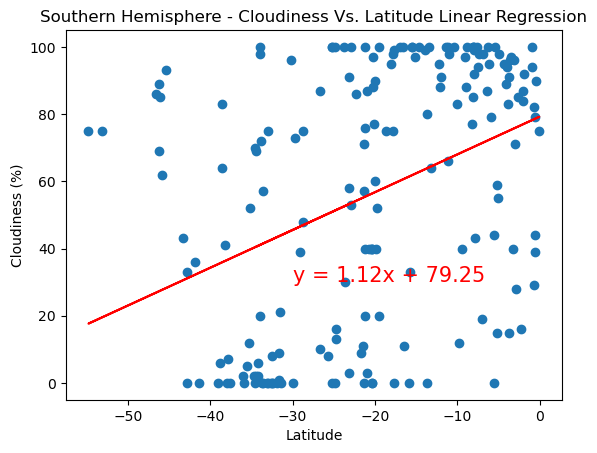

There is a weak, but positive correlation between latutude and cloudiness in the Southern Hemisphere.
It's possible that as you move closer to the equator, in the Southern Hemisphere, there will be more cloudiness.


In [22]:
# Southern Hemisphere
equation = linear_agression(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"])
annotate(equation, -30, 30)
plt.title("Southern Hemisphere - Cloudiness Vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.show()
print("There is a weak, but positive correlation between latutude and cloudiness in the Southern Hemisphere.")
print("It's possible that as you move closer to the equator, in the Southern Hemisphere, there will be more cloudiness.")

### Wind Speed Vs. Latitude Linear Regression Plot

The r-value is : 0.10049472649520477


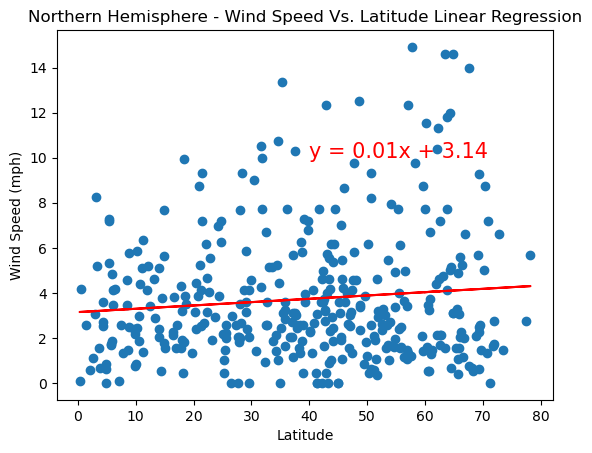

There is a very weak correlation between latitude and wind speed in the Northern Hemisphere.
It's possible that as you move away from the equator, in the Northern Hemisphere, there will be higher wind speeds. 


In [23]:
# Northern Hemisphere
equation = linear_agression(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"])
annotate(equation, 40, 10)
plt.title("Northern Hemisphere - Wind Speed Vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.show()
print("There is a very weak correlation between latitude and wind speed in the Northern Hemisphere.")
print("It's possible that as you move away from the equator, in the Northern Hemisphere, there will be higher wind speeds. ")

The r-value is : -0.3550273968018939


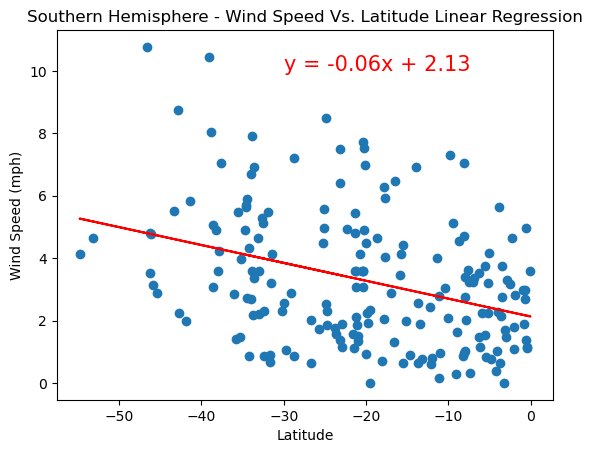

There is a very weak, negative correlation between latitude and wind speed in the Southern Hemisphere.
It's possible that as you move closer to the equator, in the Southern Hemisphere, there will be higher wind speeds.


In [24]:
# Southern Hemisphere
equation = linear_agression(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"])
annotate(equation, -30, 10)
plt.title("Southern Hemisphere - Wind Speed Vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.show()
print("There is a very weak, negative correlation between latitude and wind speed in the Southern Hemisphere.")
print("It's possible that as you move closer to the equator, in the Southern Hemisphere, there will be higher wind speeds.")